In [1]:
# sets the path to the root of the repository
from pathlib import Path
import sys
import os

root_path = os.path.dirname(os.path.abspath(''))
sys.path.append(str(root_path))
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prediction_head.data import get_regression_dataset, get_binary_dataset, get_multiclass_dataset, get_multilabel_dataset, get_zeroinflated_dataset, get_zeroinflated_negativebinomial_dataset, get_zeroinflated_exponential_dataset, TaskType
from prediction_head.GLM import GLM, train_one_epoch, train_loop, TaskSpec
from prediction_head.plot import plot_regression_distribution, plot_classification_distribution, plot_ground_truth_vs_predictions


## Zero-Inflated 

/Users/stanl/Research/Repos/prediction_head/data.py:384: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_mask = torch.tensor(torch.tensor(np.where(y_train == 0, 0, 1)))
/Users/stanl/Research/Repos/prediction_head/data.py:385: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_mask = torch.tensor(torch.tensor(np.where(y_test == 0, 0, 1)))


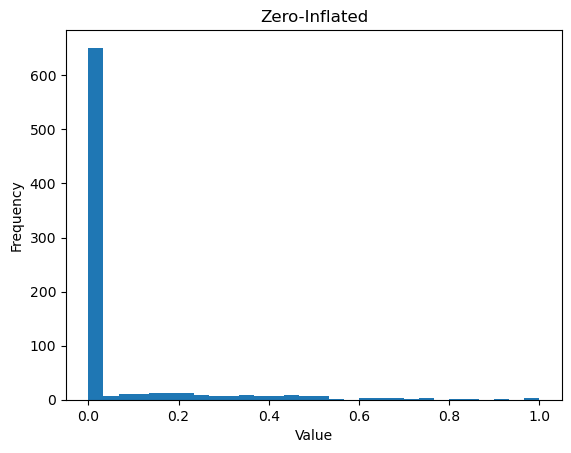

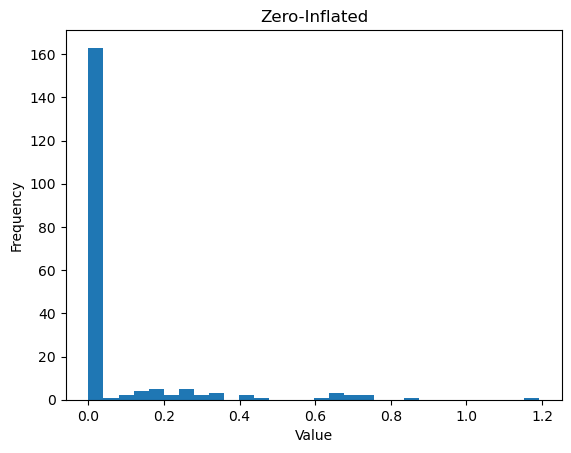

name=<TaskType.zero_inflated_binary: 'zero_inflated_binary'>
name=<TaskType.zero_inflated_regression: 'zero_inflated_regression'>


ValueError: operands could not be broadcast together with shapes (167,1) (200,1) (167,1) 

In [2]:
dataloaders: dict = {
    TaskType.zero_inflated_binary: get_zeroinflated_dataset(
        tasktype=TaskType.zero_inflated_binary
    ),
    TaskType.zero_inflated_regression: get_zeroinflated_dataset(
        tasktype=TaskType.zero_inflated_regression
    ),
}
task_specs = [
    TaskSpec(TaskType.zero_inflated_binary, 1, TaskType.zero_inflated_binary),
    TaskSpec(TaskType.zero_inflated_regression, 1, TaskType.zero_inflated_regression)]
train_dataloader = dataloaders[TaskType.zero_inflated_regression][0]
test_dataloader = dataloaders[TaskType.zero_inflated_regression][1]
scaler = dataloaders[TaskType.zero_inflated_regression][2]
# plot data (train)
plot_regression_distribution(np.array(train_dataloader.dataset.y), title="Zero-Inflated", xlabel="Value", ylabel="Frequency")
# plot data (test)
plot_regression_distribution(np.array(test_dataloader.dataset.y), title="Zero-Inflated", xlabel="Value", ylabel="Frequency")
# run ML model
results = train_loop(25, task_specs, dataloaders, epochs=10)
print(results["zero_inflated_binary"][0],results["zero_inflated_regression"][0])
# plot parity plot
plot_ground_truth_vs_predictions(results["zero_inflated_regression"][1], results["zero_inflated_regression"][2], title="Zero-Inflated", xlabel="Ground Truth", ylabel="Predictions")

## Zero-Inflated-Negative-Binomial

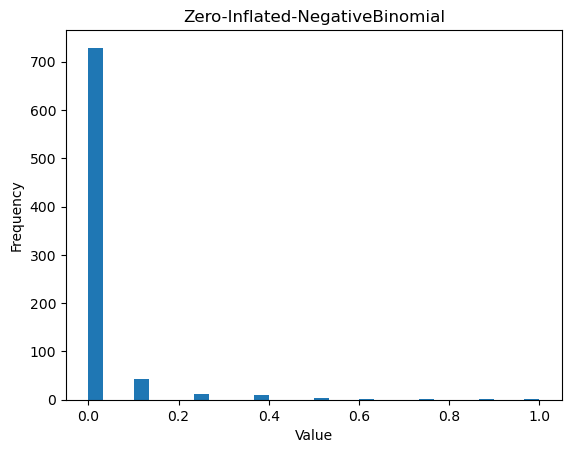

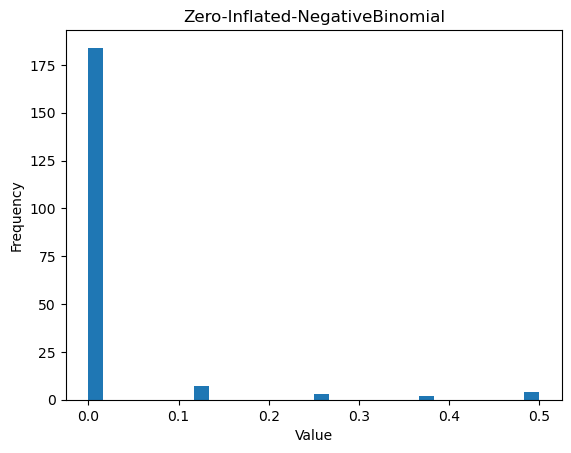

ValueError: Input contains NaN.

In [4]:
dataloaders: dict = {
    "zero_inflated_binary": get_zeroinflated_negativebinomial_dataset(
        tasktype=TaskType.zero_inflated_binary
    ),
    "zero_inflated_regression": get_zeroinflated_negativebinomial_dataset(
        tasktype=TaskType.zero_inflated_regression
    ),
}
glm_dict = {
    "zero_inflated_binary": {
        "input_dim": 25,
        "output_dim": 2,
        "tasktype": "zero_inflated_binary",
        "loss_fn_index": 0,
    },
    "zero_inflated_regression": {
        "input_dim": 25,
        "output_dim": 1,
        "tasktype": "zero_inflated_regression",
        "loss_fn_index": 0,
    },
}
train_dataloader = dataloaders["zero_inflated_regression"][0]
test_dataloader = dataloaders["zero_inflated_regression"][1]
scaler = dataloaders["zero_inflated_regression"][2]
# plot data (train)
plot_regression_distribution(np.array(train_dataloader.dataset.y), title="Zero-Inflated-NegativeBinomial", xlabel="Value", ylabel="Frequency")
# plot data (test)
plot_regression_distribution(np.array(test_dataloader.dataset.y), title="Zero-Inflated-NegativeBinomial", xlabel="Value", ylabel="Frequency")
# run ML model
results = train_loop(glm_dict, dataloaders, epochs=10)
print(results["zero_inflated_binary"][0],results["zero_inflated_regression"][0])
# plot parity plot
plot_ground_truth_vs_predictions(results["zero_inflated_regression"][1], results["zero_inflated_regression"][2], title="Zero-Inflated-NegativeBinomial", xlabel="Ground Truth", ylabel="Predictions")

## Zero-Inflated-Exponential

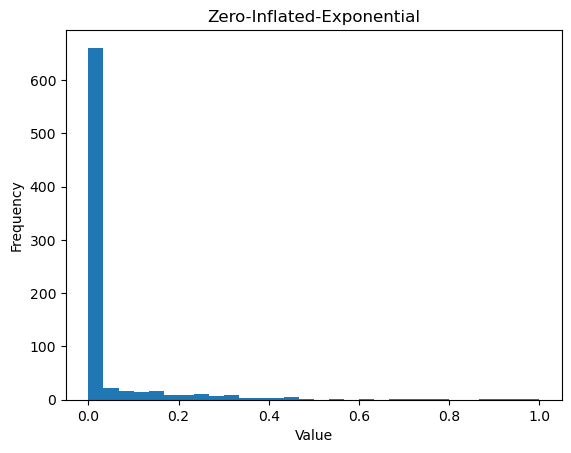

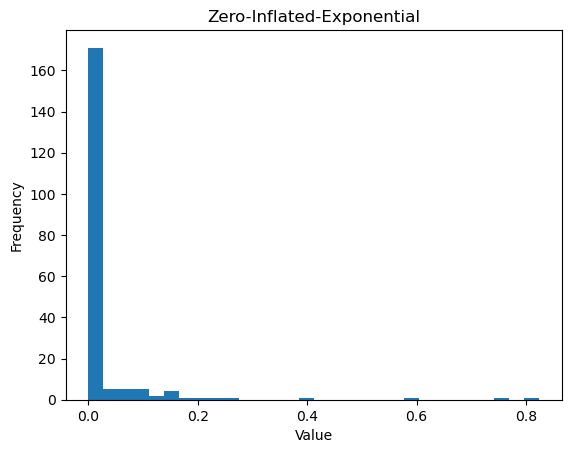

predictions_binary=array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 

/Users/stanl/Research/Repos/prediction_head/GLM.py:237: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  results[metric_name] = metric(


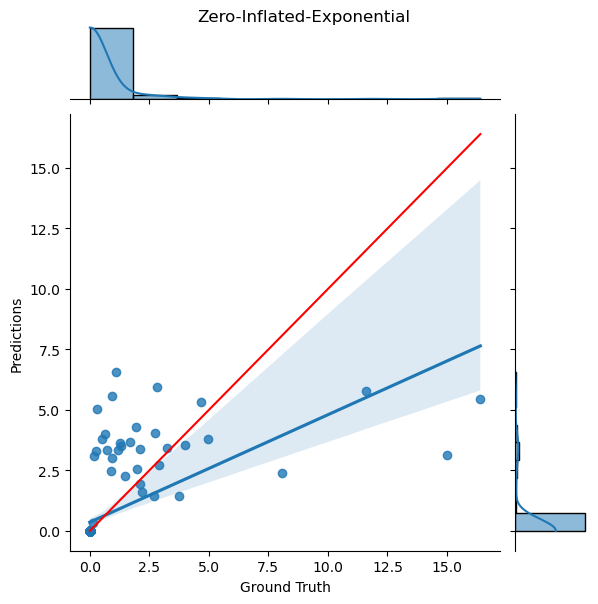

In [5]:
dataloaders: dict = {
    "zero_inflated_binary": get_zeroinflated_exponential_dataset(
        tasktype=TaskType.zero_inflated_binary
    ),
    "zero_inflated_regression": get_zeroinflated_exponential_dataset(
        tasktype=TaskType.zero_inflated_regression
    ),
}
glm_dict = {
    "zero_inflated_binary": {
        "input_dim": 25,
        "output_dim": 2,
        "tasktype": "zero_inflated_binary",
        "loss_fn_index": 0,
    },
    "zero_inflated_regression": {
        "input_dim": 25,
        "output_dim": 1,
        "tasktype": "zero_inflated_regression",
        "loss_fn_index": 0,
    },
}
train_dataloader = dataloaders["zero_inflated_regression"][0]
test_dataloader = dataloaders["zero_inflated_regression"][1]
scaler = dataloaders["zero_inflated_regression"][2]
# plot data (train)
plot_regression_distribution(np.array(train_dataloader.dataset.y), title="Zero-Inflated-Exponential", xlabel="Value", ylabel="Frequency")
# plot data (test)
plot_regression_distribution(np.array(test_dataloader.dataset.y), title="Zero-Inflated-Exponential", xlabel="Value", ylabel="Frequency")
# run ML model
results = train_loop(glm_dict, dataloaders, epochs=10)
print(results["zero_inflated_binary"][0],results["zero_inflated_regression"][0])
# plot parity plot
plot_ground_truth_vs_predictions(results["zero_inflated_regression"][1], results["zero_inflated_regression"][2], title="Zero-Inflated-Exponential", xlabel="Ground Truth", ylabel="Predictions")